# Deviation From Normality

* Normal distribution is symmetric: The prob. of getting an outcome below the mean or $P(X<\mu) = P(X>\mu)$
* Time series returns on different asset classes are generally not normally distributed 
* Normal assumption is a simplifying assumption that underestimate the magnitude of extreme returns
* To do justice to the actual shape of the return distribution, we should actually move beyond the mean and variance


## Higher Order Moments

  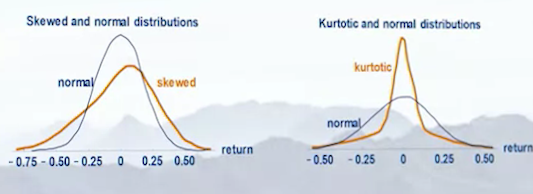

1. Skewness:
    * is the degree of asymmetry observed in a probability distribution
      $$S(R) = \frac{E\big[(R - E(R))^3\big]}{\big[Var(R)\big]^{3/2}}\tag{1}$$
    * is related to the third moment of the return distribution
    * and then normalized by the variance of the return to the power of 1.5 or to the volatility (std) to the power of 3
    * Distribution with negative skewness: $P(X<\mu) > P(X>\mu)$
    * Positive skewness $P(X<\mu) < P(X>\mu)$
    
    
    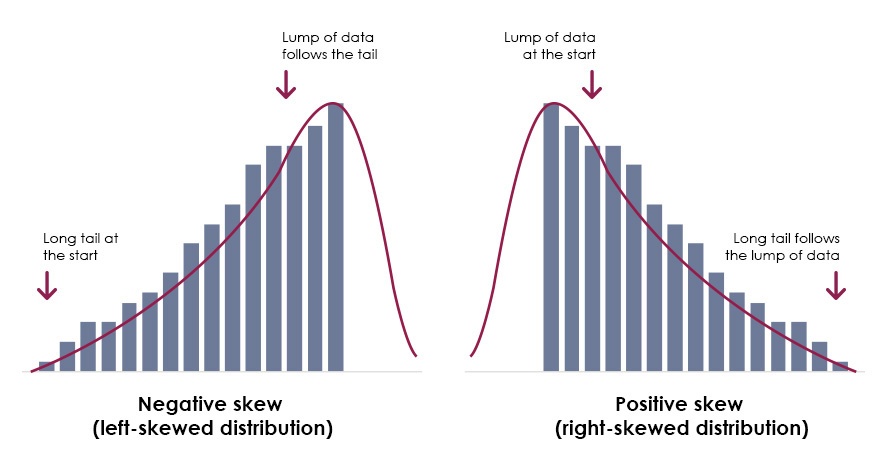


2. Kurtosis

    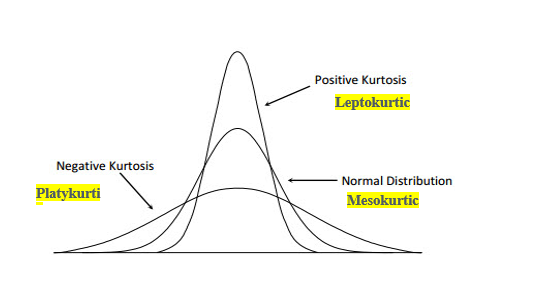

    * Distributions with large kurtosis exhibit tail data exceeding the tails of the normal distribution
      $$ K(R) =  \frac{E\big[(R - E(R))^4\big]}{\big[Var(R)\big]^{2}}\tag{2}$$
    * It is related to the 4. moment of the return distributions
    * and normalized by the std to the four or the square of the variance
    * K(R) = 3, if R is Gaussian distributed
    * K(R) > 3 => fat tail distribution
    * Excess curtosis = K(R) - 3

>In finance, kurtosis is used as a measure of financial risk. A large kurtosis is associated with a high level of risk for an investment because it indicates that there are high probabilities of extremely large and extremely small returns. On the other hand, a small kurtosis signals a moderate level of risk because the probabilities of extreme returns are relatively low.


## Evidence of Non Normality - Hedge Funds (HF) 

* HF return distributions have very often a Kurtosis $K(R) >> 3$ and $S(R) < 0$.

## Jarque-Bera Test

$$JB = \frac{n}{6}\bigg(S^2 + \frac{(K-3)^2}{4}\bigg) \rightarrow chi-squared(2)\tag{3}$$
* Is a goodness-of-fit test of whether sample data have the skewnes and kurtosis matching a normal distribution.
* The test statistic is always nonnegative
* If it is far from zero: it signals the data do not have a normal distribution

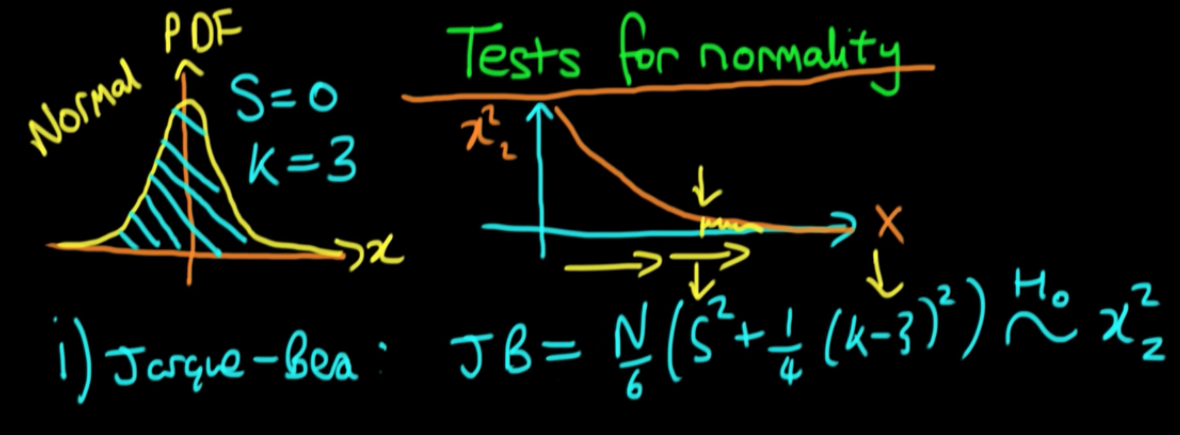

* Python statsmodels includes an implementation of the Jarque–Bera test, `statsmodels.stats.stattools.py`.

## Wrap-Up

* Asset returns are not nomally distributed
* Deviations from normality can be severe
    
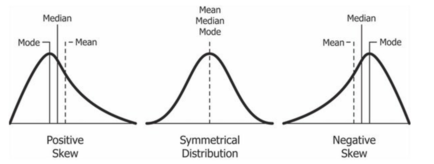

* if the mean is lower than the median, then the probability of an outcome above the mean is higher than the probability of an outcome below the mean.
* The main message here is that using volatility as a risk estimate for a negatively skew distribution may lead to underestimate the tail risk associated to strong negative returns.

## Lab Session - Deviation From Normality


In [8]:
# magic function to load autoreload
%load_ext autoreload
# Autoreload mode 2
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import edhec_risk_kit as erk
import pandas as pd

In [10]:
hfi = erk.get_hfi_returns()
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


### Skeweness

A quick and dirty way to test skeweness is by comparing the mean and the median:   
* The expected return is the mean. 
* So if you have a return series, 
* where the median return is less than the mean return, 
* then you have got a negatively-skewed returns.

In [14]:
# compare mean to median:
pd.concat([hfi.mean(), hfi.median(), hfi.mean()>hfi.median()], axis="columns")

,0,1,2
Convertible Arbitrage,0.005508,0.0065,False
CTA Global,0.004074,0.0014,True
Distressed Securities,0.006946,0.0089,False
Emerging Markets,0.006253,0.0096,False
Equity Market Neutral,0.004498,0.0051,False
Event Driven,0.006344,0.0084,False
Fixed Income Arbitrage,0.004365,0.0055,False
Global Macro,0.005403,0.0038,True
Long/Short Equity,0.006331,0.0079,False
Merger Arbitrage,0.005356,0.0060,False


`r.std(ddof=0)` it means that the degree of freedom has been set to zero, which basically means don't make that $n-1$ correction.

In [29]:
# Compute skeweness using own module
own = erk.skewness(hfi)
own.sort_values()

Fixed Income Arbitrage   -3.940320
Convertible Arbitrage    -2.639592
Equity Market Neutral    -2.124435
Relative Value           -1.815470
Event Driven             -1.409154
Merger Arbitrage         -1.320083
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Long/Short Equity        -0.390227
Funds Of Funds           -0.361783
CTA Global                0.173699
Short Selling             0.767975
Global Macro              0.982922
dtype: float64

In [31]:
# Compute skeweness using scipy and compare with previous results
import scipy.stats
spy = scipy.stats.skew(hfi)
data = {
    'Our Results': own,
    'Scipy Results': spy
}
pd.DataFrame(data)

,Our Results,Scipy Results
Convertible Arbitrage,-2.639592,-2.639592
CTA Global,0.173699,0.173699
Distressed Securities,-1.300842,-1.300842
Emerging Markets,-1.167067,-1.167067
Equity Market Neutral,-2.124435,-2.124435
Event Driven,-1.409154,-1.409154
Fixed Income Arbitrage,-3.940320,-3.940320
Global Macro,0.982922,0.982922
Long/Short Equity,-0.390227,-0.390227
Merger Arbitrage,-1.320083,-1.320083


Perfect, the results match!

In [34]:
import numpy as np
normal_rets = np.random.normal(0, .15, size=(2630, 1))

In [35]:
erk.skewness(normal_rets)

-0.03176182608589582

### Kurtosis


In [36]:
erk.kurtosis(normal_rets)

2.878524852370757

In [37]:
erk.kurtosis(hfi)

Convertible Arbitrage     23.280834
CTA Global                 2.952960
Distressed Securities      7.889983
Emerging Markets           9.250788
Equity Market Neutral     17.218555
Event Driven               8.035828
Fixed Income Arbitrage    29.842199
Global Macro               5.741679
Long/Short Equity          4.523893
Merger Arbitrage           8.738950
Relative Value            12.121208
Short Selling              6.117772
Funds Of Funds             7.070153
dtype: float64

In [38]:
# it gives the excess kurtosis and not the kurtosis as erk.kurtosis()
scipy.stats.kurtosis(normal_rets)

array([-0.12147515])

In [39]:
# jarque bera test:
scipy.stats.jarque_bera(normal_rets)

Jarque_beraResult(statistic=2.05923146899814, pvalue=0.35714417238888185)

In [40]:
# we are interested in the p-value:
scipy.stats.jarque_bera(normal_rets).pvalue

0.35714417238888185

In [42]:
# The function is taking the whole dataframe as one set of returns
# and computing one jarque bera pvalue.
# That's not what we want
scipy.stats.jarque_bera(hfi)

Jarque_beraResult(statistic=25656.585999171326, pvalue=0.0)

In [43]:
erk.is_normal(normal_rets)

True

In [45]:
# since we want to compute JB on each column we use the function aggregate:
hfi.aggregate(erk.is_normal)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

In [46]:
ffme = erk.get_ffme_returns()
erk.skewness(ffme)

SmallCap    4.410739
LargeCap    0.233445
dtype: float64

In [47]:
erk.kurtosis(ffme)

SmallCap    46.845008
LargeCap    10.694654
dtype: float64

In [48]:
erk.is_normal(ffme)

SmallCap    False
LargeCap    False
dtype: bool

In [49]:
ffme.aggregate(erk.is_normal)

SmallCap    False
LargeCap    False
dtype: bool